# Modules

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Data

In [2]:
df = pd.read_csv("data\AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


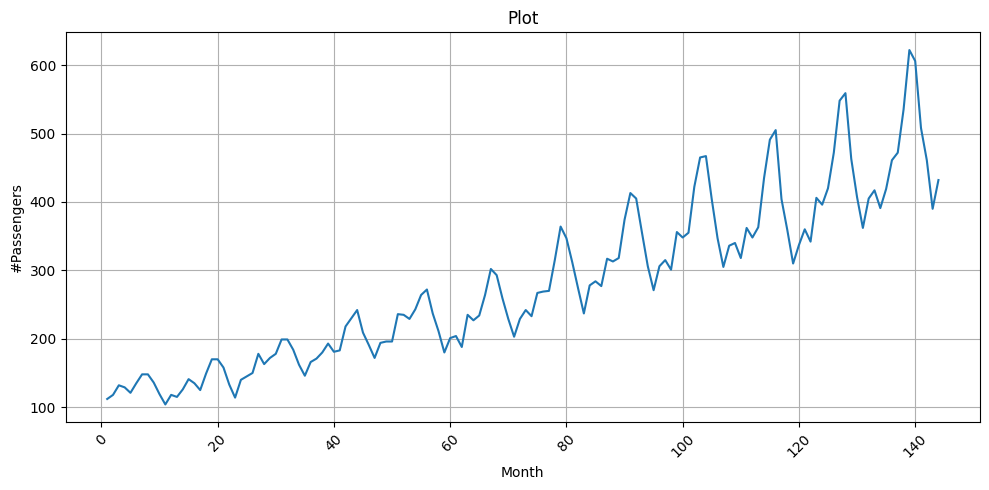

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, df.Month.values.shape[0] + 1), df['#Passengers'],  linestyle='-')
plt.title("Plot")
plt.xlabel("Month")
plt.ylabel("#Passengers")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Stationarity Test

In [6]:
# Check stationarity
result = adfuller(df['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.8153688792060435
p-value: 0.9918802434376409


In [7]:
diff_data = df["#Passengers"].diff().dropna()
diff_data = diff_data.diff().dropna()
result = adfuller(diff_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -16.384232
p-value: 0.000000


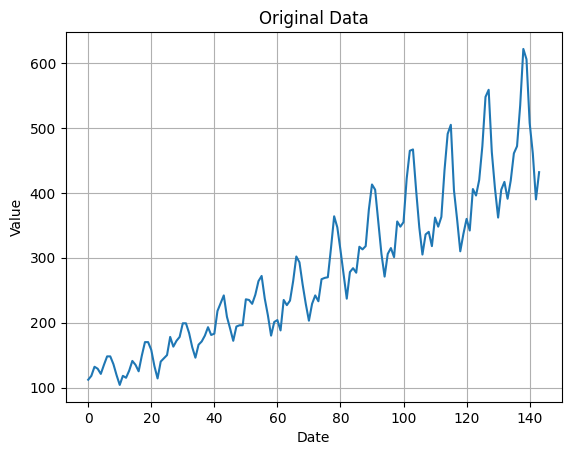

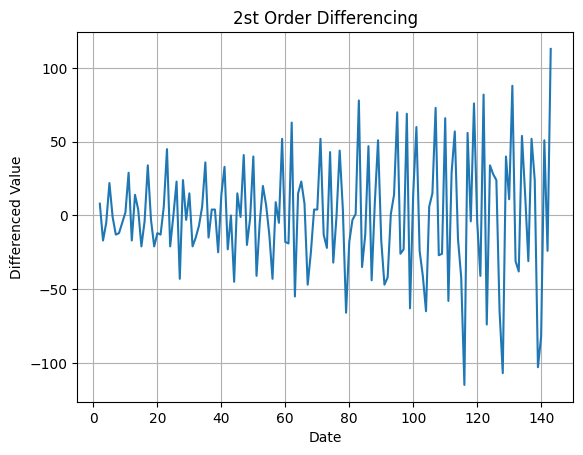

In [8]:
# Plot pertama untuk Transformed Data
plt.figure()
plt.plot(df["#Passengers"])
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.show()

# Plot kedua untuk 1st Order Differencing
plt.figure()
plt.plot(diff_data)
plt.title('2st Order Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.grid()
plt.show()

# ACF & PACF

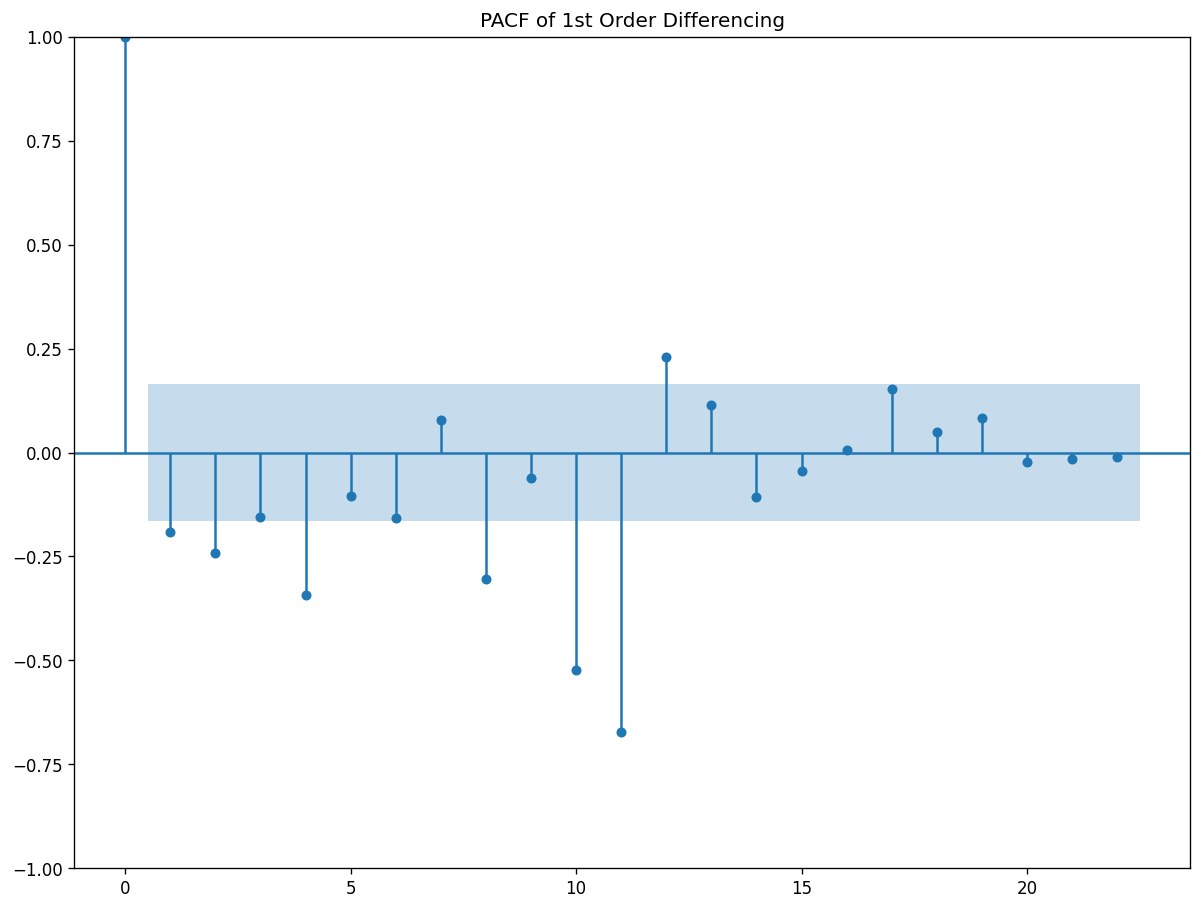

In [9]:
# AR (p)
# PACF plot of 1st differenced series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize': (12, 9), 'figure.dpi': 120})
fig, axes = plt.subplots(1, 1, sharex=True)
plot_pacf(diff_data, ax=axes)
axes.set_title('PACF of 1st Order Differencing')

plt.show()

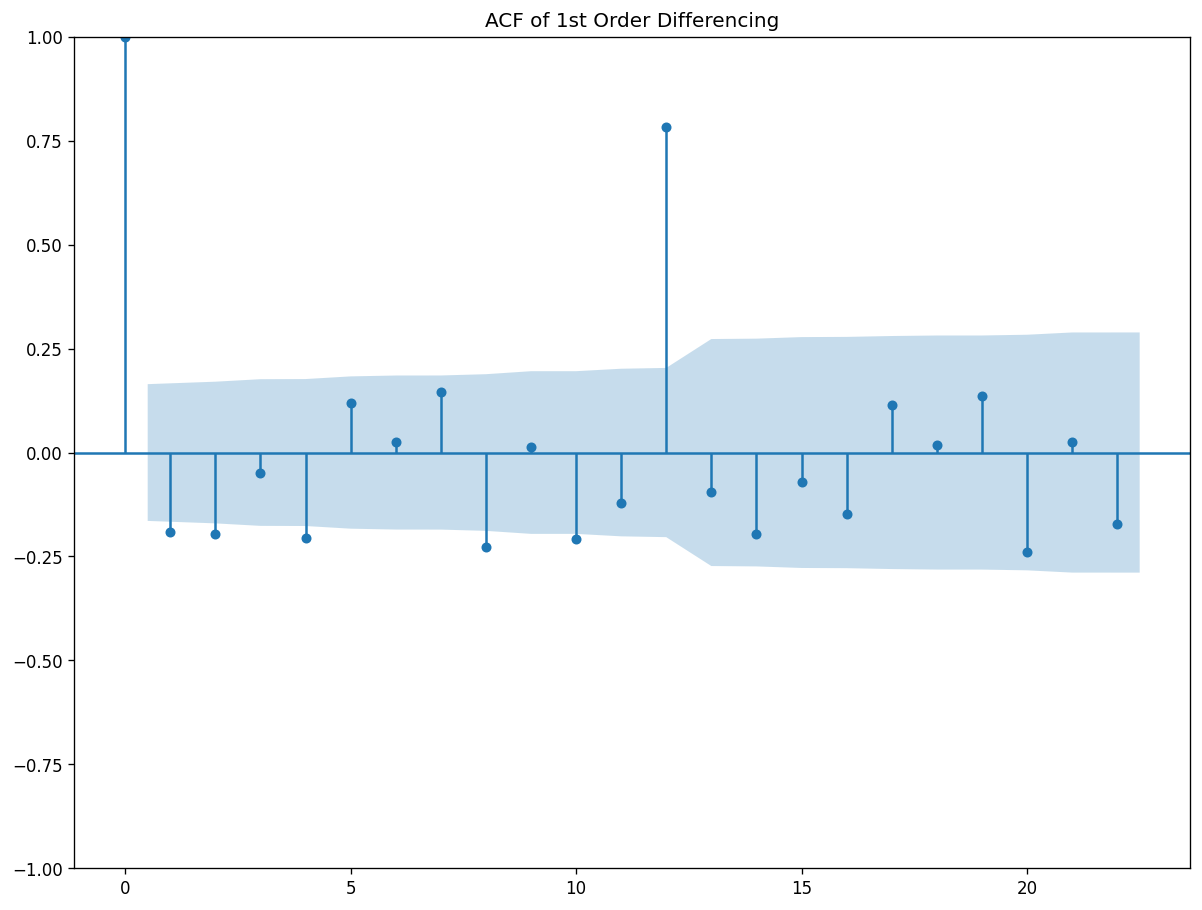

In [10]:
# MA (q)
# ACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize': (12, 9), 'figure.dpi': 120})
fig, axes = plt.subplots(1, 1, sharex=True)
plot_acf(diff_data, ax=axes)
axes.set_title('ACF of 1st Order Differencing')

plt.show()

# Model

In [24]:
import itertools
import warnings
warnings.filterwarnings("ignore")


# Define the p, d, q and P, D, Q parameters to take any value between 0 and 2
p = range(0, 3)
d = 2
q = range(0, 3)
P =
D = 
Q = range(0, 3)
m = 12  # Set the number of periods in each season

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q triplets
seasonal_pdq = [(x[0], x[1], x[2], m) for x in pdq]

# Initialize variables to store the best parameters
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None

# Grid search
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(diff_data,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print(f'Best SARIMA model: ARIMA{best_pdq} x {best_seasonal_pdq}12 - AIC:{best_aic}')

In [ ]:
# Define the model
# p, d, q are the non-seasonal parameters
# P, D, Q are the seasonal parameters
# m is the number of periods in each season
model = SARIMAX(df['value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
model_fit = model.fit(disp=False)

# Summary of the model
print(model_fit.summary())

In [ ]:
# Forecasting
n_forecast = 12  # Number of steps to forecast
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_index = pd.date_range(start=df.index[-1], periods=n_forecast+1, closed='right')
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean}, index=forecast_index)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df['value'], label='Observed')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

In [11]:
# Split the data into training and testing sets
train_size = int(len(diff_data) * 0.8)
train, test = diff_data.iloc[:train_size], diff_data.iloc[train_size:]

In [ ]:
error = mean_squared_error(test, arima_pred)
print('Test MSE: %.3f' % error)

In [ ]:
# Plot the results
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, arima_pred1, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in Meantemp')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

c:\Anaconda\envs\myenv\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=841.234, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=790.173, Time=0.31 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=839.236, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=791.205, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=792.160, Time=0.89 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=792.166, Time=0.54 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=790.378, Time=0.34 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.99 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=837.215, Time=0.39 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=787.019, Time=0.93 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=788.235, Time=0.28 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=788.930, Time=1.52 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=78

c:\Anaconda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Anaconda\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


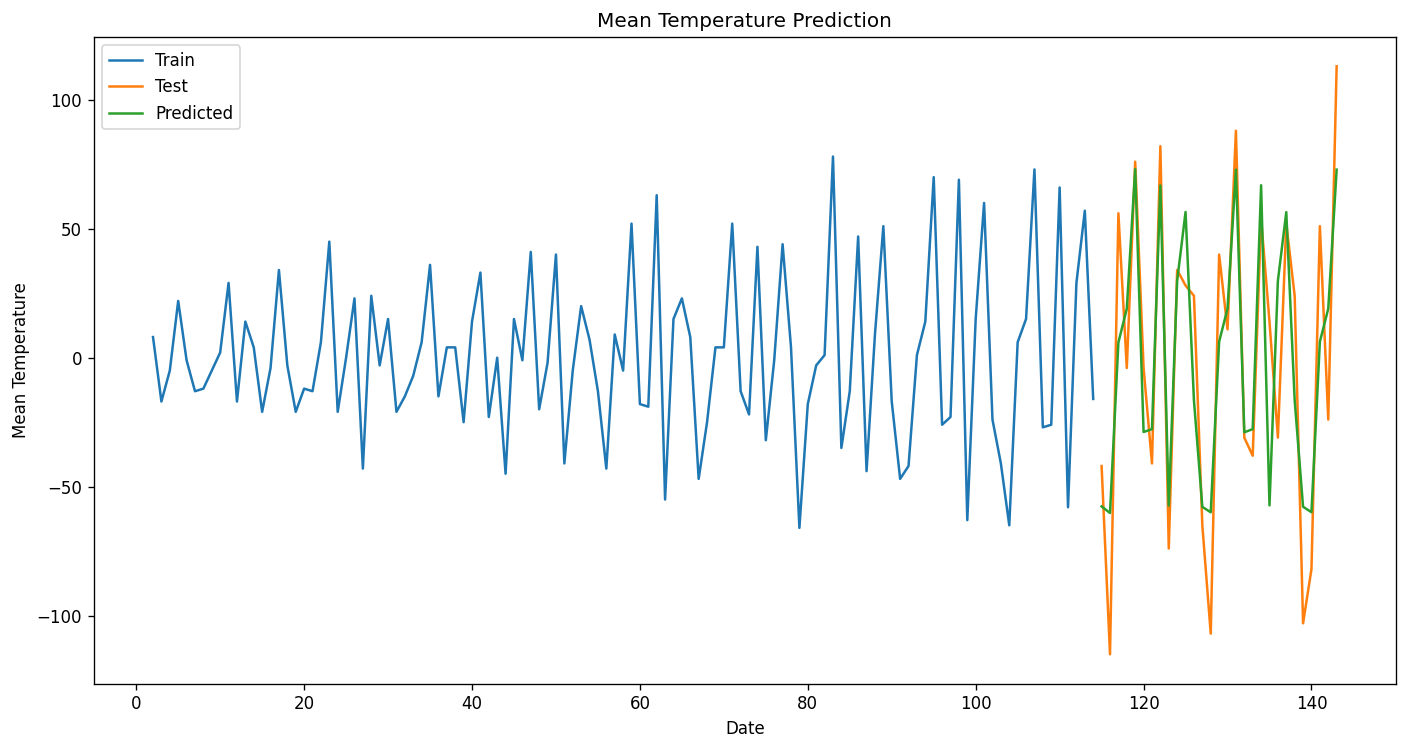

In [12]:
from pmdarima import auto_arima

# Fit the model on the training data with optimized settings for monthly seasonality
model = auto_arima(
    train, 
    seasonal=True, 
    m=12,
    max_p=7, 
    max_d=1, 
    max_q=3, 
    max_P=3, 
    max_D=1, 
    max_Q=2,
    trace=True,    # To print the progress of the fitting
    error_action='ignore',  # Ignore potential errors
    suppress_warnings=True,  # Suppress warnings
    n_jobs=-1  # Use all available CPU cores
)

# Print model summary
print(model.summary())

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Make predictions
n_periods = len(test)
auto_arima_pred = model.predict(n_periods=n_periods)

# Calculate R^2 and RMSE
r2 = r2_score(test, auto_arima_pred)
rmse = np.sqrt(mean_squared_error(test, auto_arima_pred))
mae = mean_absolute_error(test, auto_arima_pred)
mse = mean_squared_error(test,auto_arima_pred)
mape = mean_absolute_percentage_error(test,auto_arima_pred)

print(f'R^2 score: {r2}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape:.2f}%')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, auto_arima_pred, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Prediction')
plt.show()